In [15]:
def space():
    print('\n'*10)
    return 

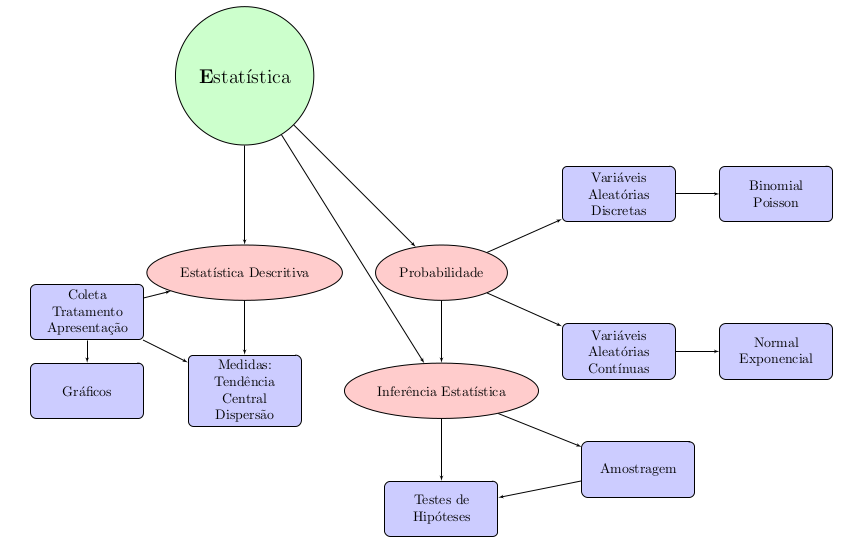

In [8]:
from IPython.display import Image
from IPython.core.display import HTML
import os
cwd = os.getcwd()
Image(filename = cwd + "/IFMG.png")

In [16]:
space()

# Gráficos Estatísticos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dados1 = pd.Series(np.random.normal(loc=50, scale=10, size=1000), name='dados1')
dados2 = pd.Series(np.random.normal(loc=25, scale=5, size=1000), name='dados2')


Visualização dos primeiros e últimos dados:

In [8]:
print('dados1:\n')
print(dados1.head().to_string())
print('\t.\n\t.\n\t.\n')
print(dados1.tail().to_string())

dados1:

0    43.921009
1    58.273675
2    38.398851
3    65.369910
4    46.747335
	.
	.
	.

995    52.170321
996    54.106179
997    34.191659
998    26.146178
999    43.699077


In [ ]:
print('dados2:\n')
print(dados2.head().to_string())
print('\t.\n\t.\n\t.\n')
print(dados2.tail().to_string())


Medidas de Estatísticas:

In [13]:
teste = {'dados1': dados1.describe(), 'dados2': dados2.describe()}
teste = pd.DataFrame(teste)
teste


,dados1,dados2
count,1000.000000,1000.000000
mean,50.033777,25.202180
std,10.034413,4.938960
min,17.323026,10.785579
25%,43.377176,21.742028
50%,49.890293,25.169359
75%,56.540941,28.670039
max,94.063861,42.605160


Gráfico de Pizza:

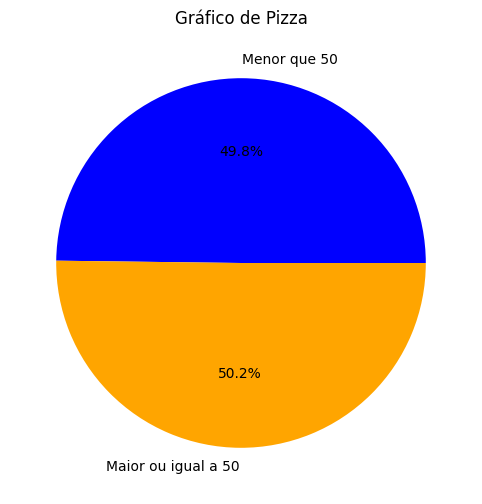

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie([dados1[dados1 < 50].count(), dados1[dados1 >= 50].count()], labels=['Menor que 50','Maior ou igual a 50'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Gráfico de Pizza')
plt.show()

Histograma:

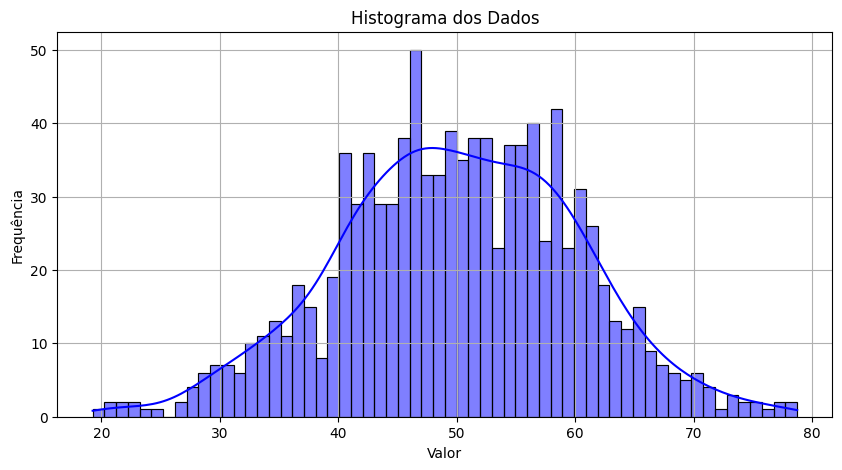

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(dados1, bins=60, kde=True, color='blue', edgecolor='black')
plt.title('Histograma dos Dados')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Gráfico de Densidade:

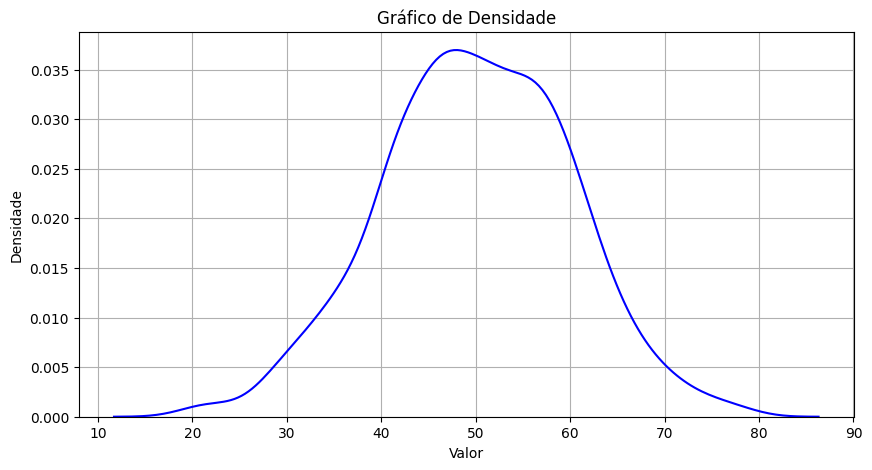

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(dados1, color='blue')
plt.title('Gráfico de Densidade')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()

Boxplot:

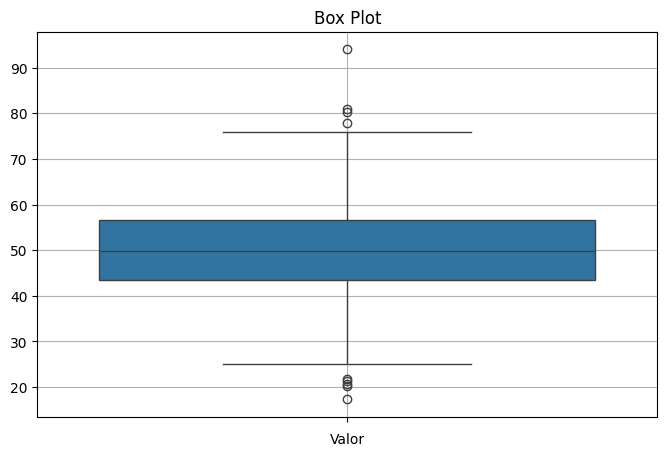

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados1, orient='v')
plt.title('Box Plot')
plt.xlabel('Valor')
plt.grid(True)
plt.show()

Gráfico de Dispersão:

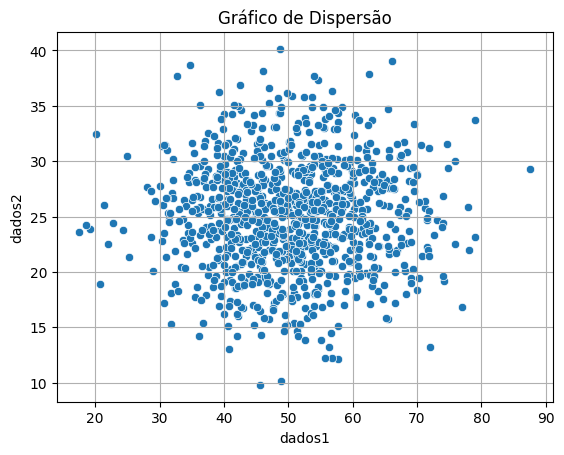

In [21]:
data=pd.concat([dados1,dados2], axis=1)
sns.scatterplot(x="dados1", y="dados2", data=data)
plt.title('Gráfico de Dispersão')
plt.xlabel('dados1')
plt.ylabel('dados2')
plt.grid(True)
plt.show()

In [17]:
space()


# Distribuições de Probabilidade

In [41]:
from scipy.stats import uniform, norm, binom, poisson, expon


#Parâmetros: (O que determina uma Distribuição de Probabilidade são os parâmetros)

In [29]:
n = 50
p = 0.4
mu = n*p #média na Distribuição Binomial
desv = np.sqrt(mu*(1-p))

#Distribuição Uniforme

$$f(x) = \dfrac{1}{b-a}\\[20pt]$$
$$P(c\leq x \leq d) = \dfrac{d - c}{b - a}\hspace{20pt} \mu = \dfrac{b-a}{2} \hspace{20pt} \sigma^2 = \dfrac{(b-a)^2}{12}$$

- Variáveis Aleatórias (rvs): **uniform.rvs(loc, scale, size)**
- Parâmetros: loc (parâmetro de localização), scale (parâmetro de escala), size (parâmetro de tamanho)

- Função de Densidade de Probabilidade (PDF): **uniform.pdf(x, loc, scale)**
- Parâmetros: x (valor), loc (parâmetro de localização), scale (parâmetro de escala)

- Função de Distribuição Cumulativa (CDF): **uniform.cdf(x, loc, scale)**
- Parâmetros: x (valor), loc (parâmetro de localização), scale (parâmetro de escala)

- Função de Percent Point (PPF): **uniform.ppf(q, loc, scale)**
- Parâmetros: q (probabilidade cumulativa), loc (parâmetro de localização), scale (parâmetro de escala)

In [30]:
x = uniform.rvs(loc=0, scale=1, size=1000)
print("Média:", np.mean(x))
print("Desvio Padrão:", np.std(x))

Média: 0.505540740972468
Desvio Padrão: 0.2891957477528818


#Gráfico

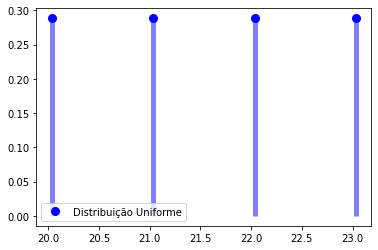

In [32]:
fig, ax = plt.subplots(1, 1)
x = np.arange(uniform.ppf(0.01, mu, desv),
              uniform.ppf(0.99, mu, desv))
ax.plot(x, uniform.pdf(x, mu, desv), 'bo', ms=8, label='Distribuição Uniforme')
plt.legend()
ax.vlines(x, 0, uniform.pdf(x, mu, desv), colors='b', lw=5, alpha=0.5)
plt.show()

#Distribuição Normal

$$f(x) = \dfrac{1}{\sigma \sqrt{2\pi}} e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}\\[20pt] P(a\leq X \leq b) = \int^b_a  \dfrac{1}{\sigma \sqrt{2\pi}} e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}\, dx$$

- Variáveis Aleatórias (rvs): **norm.rvs(loc, scale, size)**
- Parâmetros: loc (parâmetro de localização), scale (parâmetro de escala), size (parâmetro de tamanho)

- Função de Densidade de Probabilidade (PDF): **norm.pdf(x, loc, scale)**
- Parâmetros: x (valor), loc (média), scale (desvio padrão)

- Função de Distribuição Cumulativa (CDF): **norm.cdf(x, loc, scale)**
- Parâmetros: x (valor), loc (média), scale (desvio padrão)

- Função de Percent Point (PPF): **norm.ppf(q, loc, scale)**
- Parâmetros: q (probabilidade cumulativa), loc (média), scale (desvio padrão)


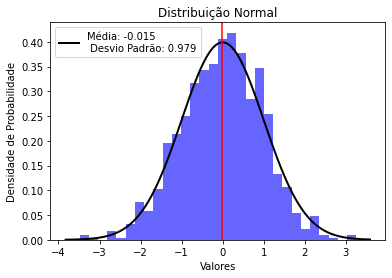

In [27]:
# Gerando dados normalmente distribuídos
dados_normais = np.random.normal(loc=0, scale=1, size=1000)

# Plotando o histograma dos dados
plt.hist(dados_normais, bins=30, density=True, alpha=0.6, color='blue')

# Plotando a função de densidade de probabilidade
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2, label=f'Média: {np.mean(dados_normais):.3f}\n Desvio Padrão: {np.std(dados_normais):.3f}')
plt.title('Distribuição Normal')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.axvline(np.mean(dados_normais), color = 'red')
plt.legend(loc=2)
plt.show()

#Distribuição Binomial

$$P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}\\[20pt]$$
$$P(X=k) = \dfrac{n!}{k!(n-k)!} p^k (1-p)^{n-k} \hspace{20pt} \mu = n\cdot p \hspace{20pt} \sigma = \sqrt{n\cdot p\cdot (1-p)}$$

- Função de Massa de Probabilidade (PMF): **binom.pmf(k, n, p)**
- Parâmetros: k (número de sucessos), n (número de tentativas), p (probabilidade de sucesso)

- Função de Percent Point (PPF): **binom.ppf(q, n, p)**
- Parâmetros: q (probabilidade cumulativa), n (número de tentativas), p (probabilidade de sucesso)



#Gráfico

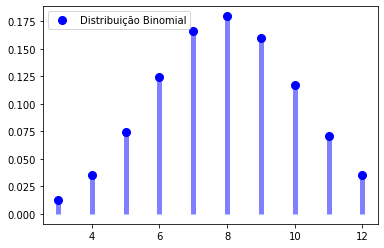

In [34]:
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, mu, p),
              binom.ppf(0.99, mu, p))
ax.plot(x, binom.pmf(x, mu, p), 'bo', ms=8, label='Distribuição Binomial')
plt.legend()
ax.vlines(x, 0, binom.pmf(x, mu, p ), colors='b', lw=5, alpha=0.5)
plt.show()

#Distribuição de Poisson

$$P(X=k) = \dfrac{e^{-\mu} \mu^k}{k!}\\[20pt]$$

$$\mu = \lambda \cdot t\hspace{20pt} \sigma^2 = \mu\hspace{20pt} \sigma = \sqrt{\mu}$$


- Função de Massa de Probabilidade (PMF): **poisson.pmf(k, mu)**
- Parâmetros: k (número de ocorrências), mu (média)

- Função de Percent Point (PPF): **poisson.ppf(q, mu)**
- Parâmetros: q (probabilidade cumulativa), mu (média)





#Gráfico

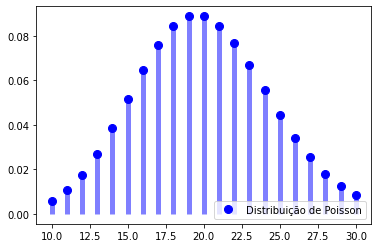

In [36]:
fig, ax = plt.subplots(1, 1)
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='Distribuição de Poisson')
plt.legend()
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

#Distribuição Exponencial

$$f(x) = \lambda e^{-\lambda x}$$

- Função de Densidade de Probabilidade (PDF): **expon.pdf(x, scale)**
- Parâmetros: x (valor), scale (parâmetro de escala)

- Função de Distribuição Cumulativa (CDF): **expon.cdf(x, scale)**
- Parâmetros: x (valor), scale (parâmetro de escala)

- Função de Percent Point (PPF): **expon.ppf(q, scale)**
- Parâmetros: q (probabilidade cumulativa), scale (parâmetro de escala)


#Gráfico

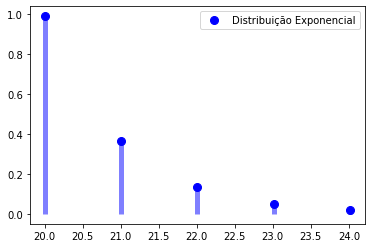

In [40]:
fig, ax = plt.subplots(1, 1)
x = np.arange(expon.ppf(0.01, mu),
              expon.ppf(0.99, mu))
ax.plot(x, expon.pdf(x, mu), 'bo', ms=8, label='Distribuição Exponencial')
plt.legend()
ax.vlines(x, 0, expon.pdf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()